In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\emmap\OneDrive\Documents\Datasets\housing.csv")
df.head()

# we want to predict median_house_value (target value)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## Data Cleaning

# check for null values
df.info()
df.isna().sum()

# remove null values
df.dropna(subset=['total_bedrooms'], inplace=True)

# check for duplicates
df[df.duplicated()] == 1
# none to remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [4]:
## Split Data into Training and Testing sets
from sklearn.model_selection import train_test_split

# model will split X and y into training and testing sets each
# x is df without median_house_value column bc all other columns are predictors
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

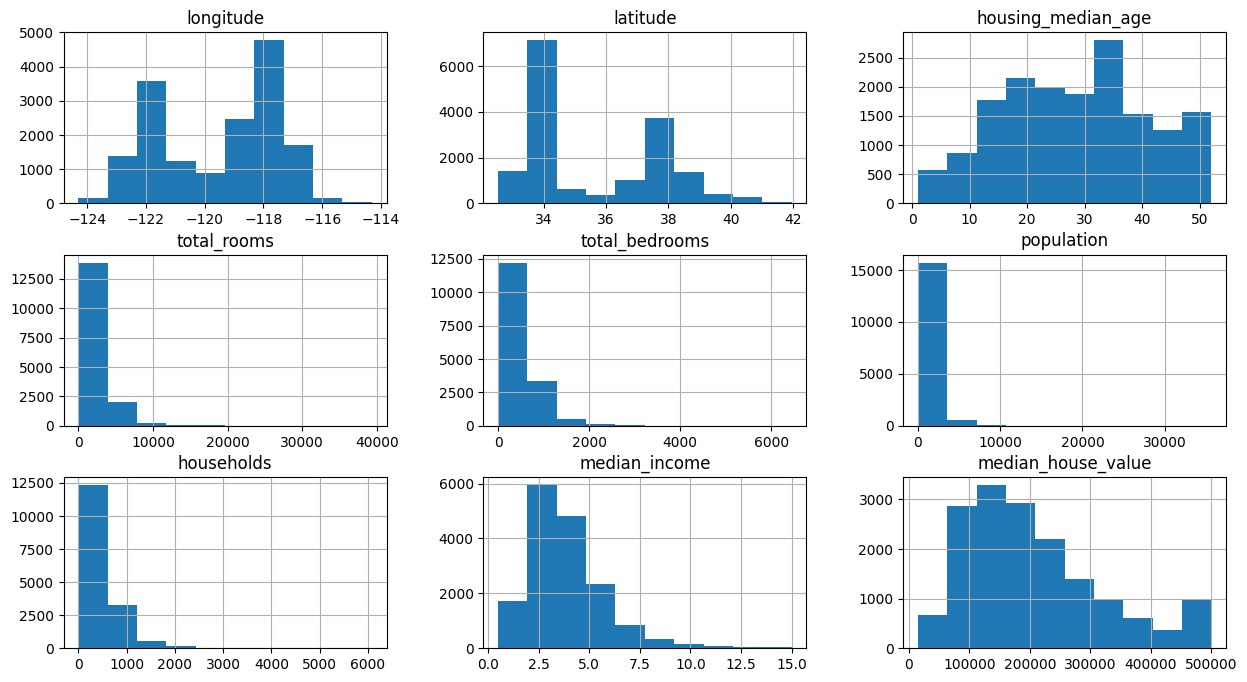

In [6]:
# only looking at training data
train_data = X_train.join(y_train)
train_data.hist(figsize=(15, 8))

<Axes: >

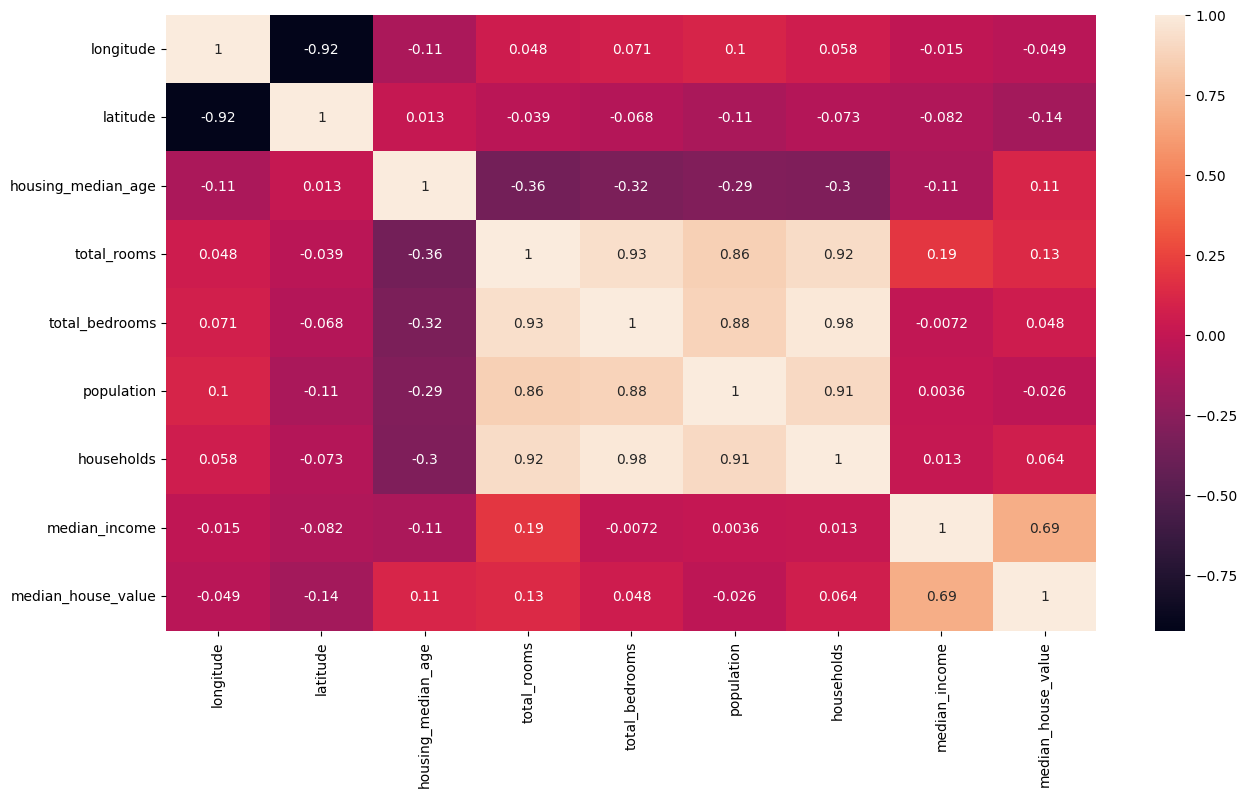

In [7]:
## Visualize Correlations
plt.figure(figsize=(15,8))
num_train_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(num_train_data.corr(), annot=True)

# median income is highly correlated with median house value

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

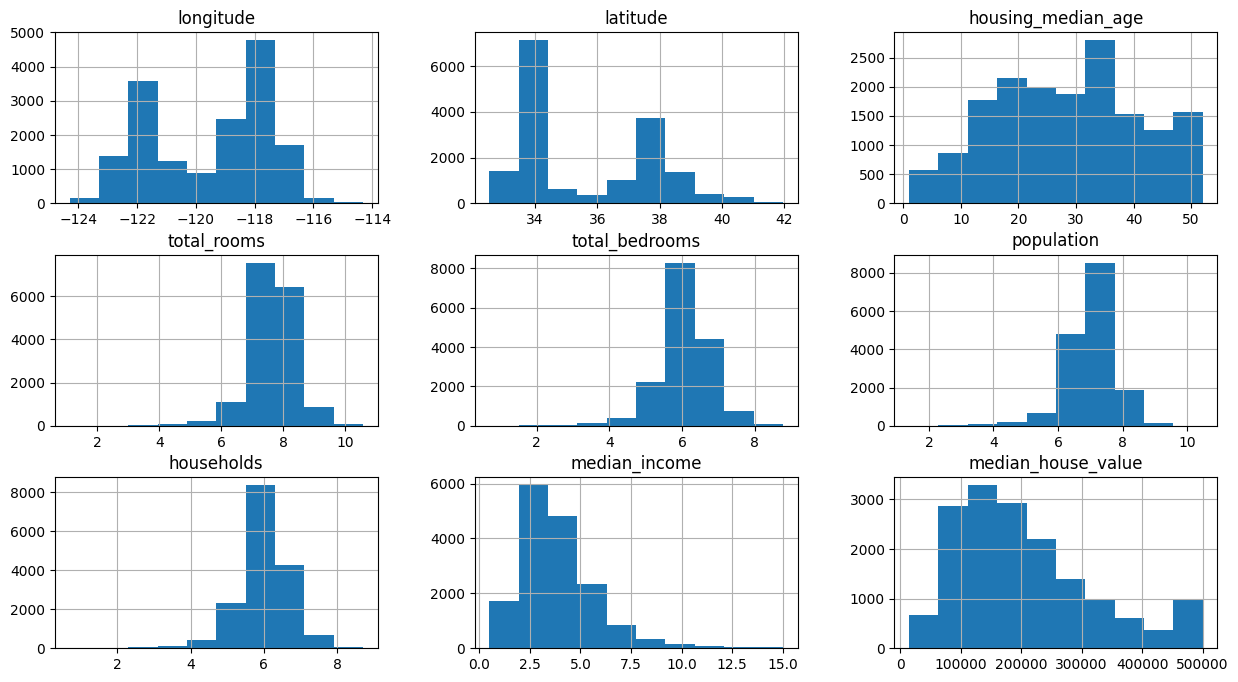

In [8]:
## Pre-Processing
# data from histogram is skewed; want bell curves; fix by taking log
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize=(15,8))
# histograms resemble bell curves now
# NOTE: be careful; don't run log functions multiple times or it 
# will keep logging the same values

In [12]:
# process ocean_proximity as a numeric value
# take category values and set into binary features
ocean_dummies = pd.get_dummies(train_data.ocean_proximity, dtype=int)
joined_train_data = train_data.join(ocean_dummies)


In [14]:
train_data = joined_train_data.drop('ocean_proximity', axis=1)

<Axes: >

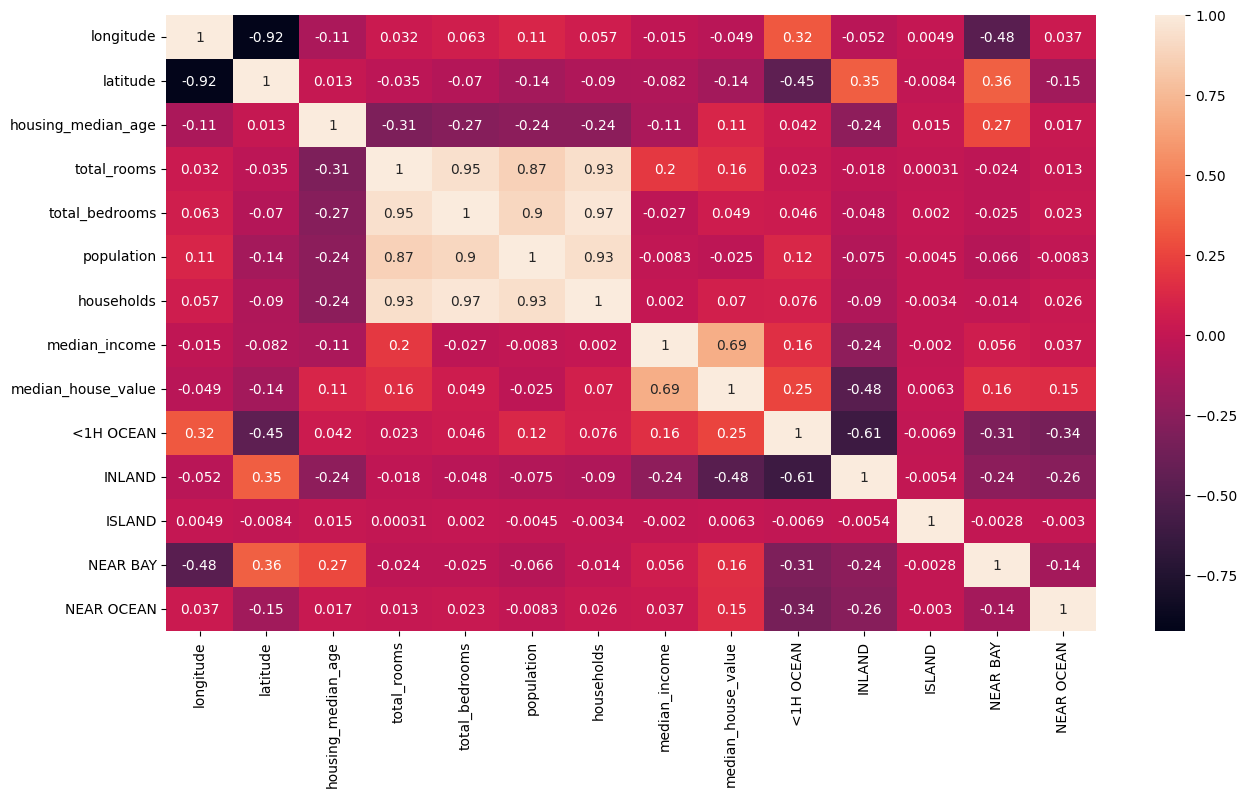

In [18]:
# look at correlation of new joined dataset
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

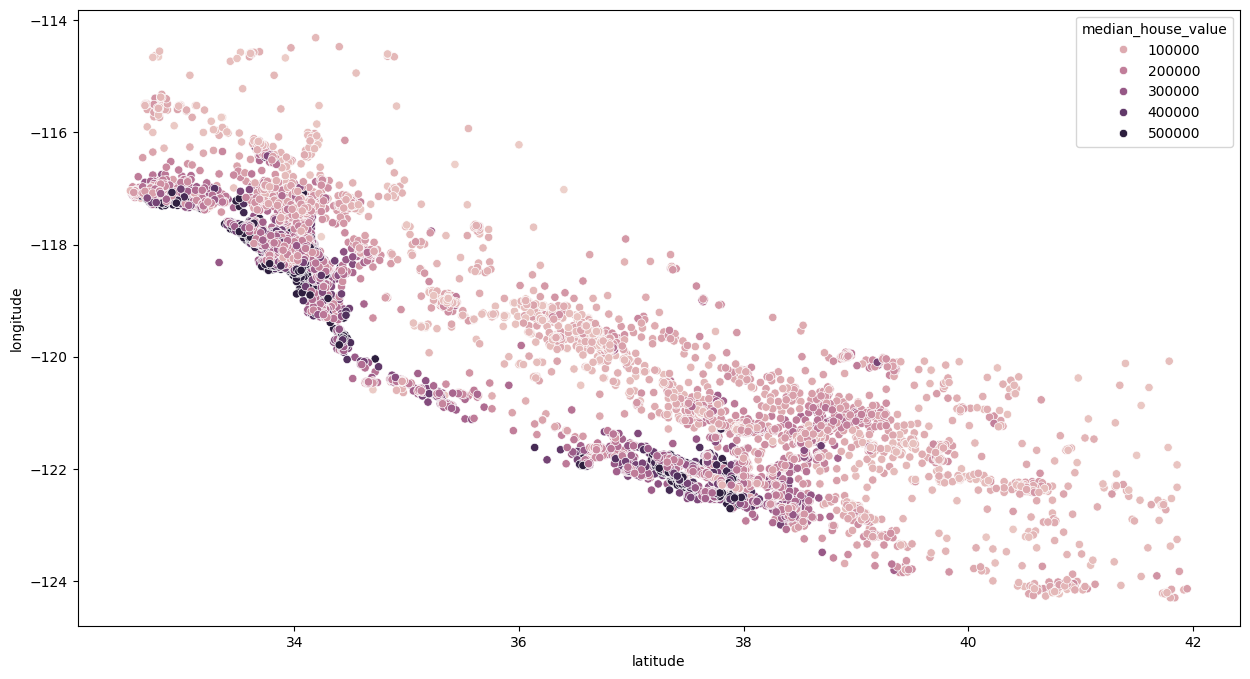

In [20]:
# identify strong correlations and view in scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value')
# we can see houses closer to coast are more expensive

<Axes: >

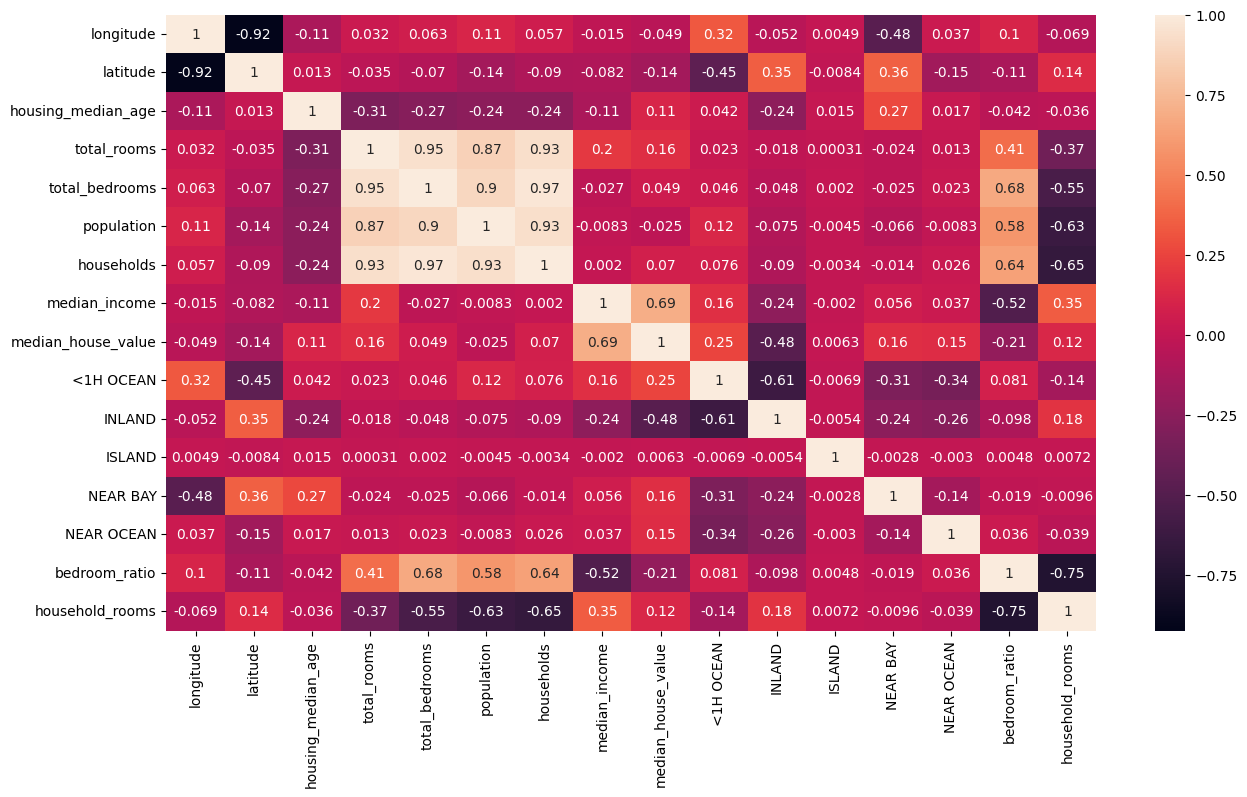

In [21]:
## Feature Engineering
# ratio of how many bedrooms to rooms total
# ratio of how many household rooms to rooms total
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# look at correlation of target variable with new features
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True
# note may drop variables that have low correlation for better model

In [30]:
## Linear Regression Modeling
from sklearn.linear_model import LinearRegression

### come back and scale after first modeling score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# must resplit X and y because of new features
X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [25]:
# redo split process for test data for new features 
# simply replace 'train' with 'test'
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
ocean_dummies = pd.get_dummies(test_data.ocean_proximity, dtype=int)
joined_test_data = test_data.join(ocean_dummies)
test_data = joined_test_data.drop('ocean_proximity', axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [28]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']


In [33]:
reg.score(X_test, y_test)
# not a great score but not terrible
# go back to [24] to fit data
X_test_s = scaler.transform(X_test)
# reg.score(X_test_s, y_test)

In [34]:
## Random Forest Modeling
# should be better than the Linear Regression modeling
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
# try with default
forest.fit(X_train, y_train)
RandomForestRegressor()
forest.score(X_test, y_test)
# already higher score which is good

0.7966309194512867

In [36]:
# try again with the fitted data
forest.fit(X_train_s, y_train)
RandomForestRegressor()
forest.score(X_test_s, y_test)
# slightly higher score which is good

0.7983876863939386

In [39]:
# cross validation: where you split data into # folds
# use #-1 folds to train data, and 1 fold for testing
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[3, 10, 30],
    "max_features": [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s, y_train)
    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
# should give the best model and therefore best score
# gives ideal estimators to use, which should give better results
best_forest = grid_search.best_estimator_
best_forest.score(X_test_s, y_test)

0.7926490000905034